## Machine Learning

In [5]:
from sklearn.datasets import load_boston

In [6]:
data = load_boston()
# 导入一个数据集，波士顿房价

In [7]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
data['DESCR']  # 每一个feature的具体意义描述

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
X, y = data['data'],data['target']

In [11]:
X[0] # 这个房子的一些数据，每一个数对应 data 的 feature name

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [12]:
y[0] # X[0] 这个房子对应的价格是24W美金

24.0

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

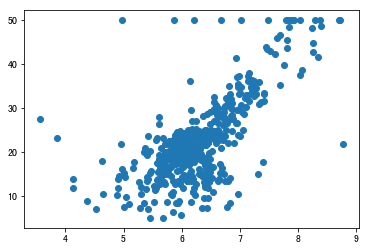

In [14]:
# 画出 第六个feature：RM 房间数量与房子价格的散点图
plt.scatter(X[:,5], y)

In [15]:
def draw_rm_and_price():
    plt.scatter(X[:,5], y)

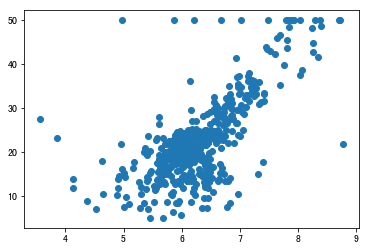

In [16]:
draw_rm_and_price()

In [17]:
import random

In [18]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b 

## First-Method: Random generation: get best k and b

In [26]:
# 生成很多组 k和b 看哪一组的结果最好
trying_times = 1000

min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y,price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is: {}, get best_k: {} best_b: {}, and the loss is {}'.format(i,best_k,best_b,min_loss))

# draw_rm_and_price()
# plt.scatter(X_rm, price_by_random_k_and_b)

When time is: 0, get best_k: 9.426533068015218 best_b: -47.412713561739665, and the loss is 158.21102738822373
When time is: 15, get best_k: 4.203438860603811 best_b: 3.535836937694242, and the loss is 110.48173179346108
When time is: 362, get best_k: 3.8554321108857863 best_b: 0.12063904690604943, and the loss is 60.4677250990564
When time is: 659, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 48.789510626015876


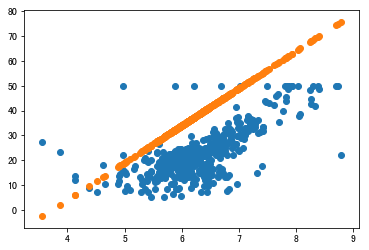

In [27]:
X_rm = X[:,5]
k = 15
b = -56
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## loss function : 评价预测结果的好坏
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})^2} $$

In [28]:
def loss(y, y_hat): # to evaluate the performance 预测值与真实值的差别
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(y)

In [29]:
loss([1,1,1],[2,3,3])

3.0

## 2nd-Method: Direction Adjusting

In [44]:
# 生成很多组 k和b 看哪一组的结果最好
trying_times = 1000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
x = X[:,5]
learning_rate = 1e-04
for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        print('When time is: {}, get best_k: {} best_b: {}, and the loss is {}'.format(i,best_k,best_b,min_loss))
    
    k_gradient = partial_k(x, y, price_by_k_and_b)
    b_gradient = partial_b(x, y, price_by_k_and_b)
    
    current_k -= k_gradient*learning_rate
    current_b -= b_gradient*learning_rate

When time is: 0, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 19947.858135464365
When time is: 1, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 19622.989599465443
When time is: 2, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 19303.42413758891
When time is: 3, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 18989.075183752946
When time is: 4, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 18679.857584959227
When time is: 5, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 18375.687578226116
When time is: 6, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 18076.48276789836
When time is: 7, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 17782.162103327235
When time is: 8, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 17492.6458569

When time is: 307, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 173.47965057362336
When time is: 308, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 171.40315635367122
When time is: 309, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 169.36055810647431
When time is: 310, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 167.35130252248524
When time is: 311, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 165.37484532424554
When time is: 312, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 163.43065111894813
When time is: 313, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 161.5181932534077
When time is: 314, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 159.6369536713959
When time is: 315, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the los

When time is: 608, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.16713344278135
When time is: 609, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.15247068289924
When time is: 610, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.13804706482863
When time is: 611, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.12385868487814
When time is: 612, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.10990170307944
When time is: 613, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.096172342146836
When time is: 614, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.08266688645416
When time is: 615, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 47.069381681028126
When time is: 616, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is

When time is: 906, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.272502604163854
When time is: 907, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.27238119650751
When time is: 908, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.27226156149403
When time is: 909, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.2721436701883
When time is: 910, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.27202749412738
When time is: 911, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.27191300531321
When time is: 912, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.271800176204444
When time is: 913, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 46.27168897970946
When time is: 914, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 

如果想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：
#### 找对改变的方向
#### 如何找对改变的方向呢？
#### 2nd-method:监督让他变化 --> 监督学习

## 2. Answer following question:

1. Why do we need machine learning methods instead of creating a complicated formula?
 实际生活中遇到的问题和数据集，很复杂，需要拟合的公式也很复杂，参数很多，所以只靠人工拟合或者简单的公式的拟合方法很难得到高的准确率。这时候就要用机器学习，让机器去拟合，修改参数。

2. What's the disadvantages of the 1st Random Choosen methods in our course?
 第一种方法，k和b两个参数的改变方向是随机的，只能够靠加大循环次数来获得更低的loss，效率很低。如果能够知道如何修改参数能使loss下降，就能提高效率。

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supervised direction method?
 第2种方法比第一种好，它有一个简单的判断方向的机制，如果按这个方向修改参数，loss减小了，那么就继续沿着这个方向走；如果loss没有减小，那么下一次就换一个方向修改参数。给了一个参考的方向，不会像第一种方法那样随机选方向，效率增加。
 缺点：只是用在参数很少的模型中，如果遇到参数很多的时候，那么参数改变的方向就会有很多种排列组合。

4. Why do we use Derivative/Grediant to fit a target function?
 求loss function的导数，导数的方向就代表了loss上升的方向，所以将参数按导数的反方向走，就能使得loss减小。这样做就不需要像第2种方法那样，一个个列出修改参数可能的方向了，而且是有监督地修改。

5. In the words 'Gradient Descent', what's the Gradient and what's the Descent?
  Gradient 指loss function对各个参数进行求导，得到的导数。在多维空间里，将导数称为 梯度；
  Descent 指按照导数的反方向一步步地修改参数，使得loss下降。

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?
  大大加快了loss下降速度。

7. Using the simple words to describe: What's the machine learning.
 使用计算机去拟合数据集，不断修改拟合模型的参数，找到拟合结果与真实结果相差最小的那组模型参数。

## 导数
一维空间称为：导数 多维空间称为：梯度

梯度下降法

## loss (第一种)
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))^2} $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum{(y_i-(kx_i+b_i))x_i} $$ 

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n} \sum{(y_i-(kx_i+b_i))} $$

In [42]:
def partial_k(x, y, y_hat):
    n = len(y)
    return -2/n * sum((y_i - y_hat_i) * x_i for x_i,y_i,y_hat_i in zip(list(X_rm),list(y),list(y_hat))) 

In [43]:
def partial_b(x, y, y_hat):
    n = len(y)
    return -2/n * sum((y_i - y_hat_i) for x_i,y_i,y_hat_i in zip(list(X_rm),list(y),list(y_hat))) 

In [33]:
trying_times = 1000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03
for i in range(trying_times):
        
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        if i % 50 == 0:
            print('When time is: {}, get best_k: {} best_b: {}, and the loss is {}'.format(i,best_k,best_b,min_loss))
    
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k -= k_gradient*learning_rate
    current_b -= b_gradient*learning_rate

When time is: 0, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 34384.94057709225
When time is: 50, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 65.72527022882647
When time is: 100, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 59.05136586338019
When time is: 150, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 59.01297479737921
When time is: 200, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 58.97595602964249
When time is: 250, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 58.939026423439884
When time is: 300, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 58.902185517119605
When time is: 350, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 58.86543309758884
When time is: 400, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 58

存在的问题：
1. 对于复杂的模型，如何初始化参数？ k b
2. 模型的函数如何定义？ price_by_k_and_b
3. 定义过于复杂的函数，可能会过拟合
4. loss function 如何定义？
5. learning rate 如何调整？
6. 正则化？

## loss (第二种)


$$ loss = \frac{1}{n} \sum{|(kx_i + b_i) - y_i|}  $$


In [37]:
def partial_k2(x, y, y_hat):
    n = len(y) 
    out = 0
    for x_i,y_i,y_hat_i in zip(list(X_rm),list(y),list(y_hat)):
        if y_i - y_hat_i >= 0:
            out += 1/n * (-x_i)
        else:
            out += 1/n * x_i
    return out
 

In [38]:
def partial_b2(x, y, y_hat):
    n = len(y)
    out = 0
    for x_i,y_i,y_hat_i in zip(list(X_rm),list(y),list(y_hat)):
        if y_i - y_hat_i >= 0:
            out += -1/n 
        else:
            out += 1/n
    return out

In [41]:
trying_times = 2000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03
for i in range(trying_times):
        
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        if i % 50 == 0:
            print('When time is: {}, get best_k: {} best_b: {}, and the loss is {}'.format(i,best_k,best_b,min_loss))
    
    k_gradient = partial_k2(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b2(X_rm, y, price_by_k_and_b)
    
    current_k -= k_gradient*learning_rate
    current_b -= b_gradient*learning_rate

When time is: 0, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 4226.879001423746
When time is: 50, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 3973.3628908516625
When time is: 100, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 3728.143964238113
When time is: 150, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 3491.2222215831202
When time is: 200, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 3262.59766288667
When time is: 250, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 3042.2702881487626
When time is: 300, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 2830.2400973694002
When time is: 350, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 2626.5070905485777
When time is: 400, get best_k: 12.025040604540266 best_b: -52.050428485045266, and the loss is 